# ECE225A Project - Google Play Store Apps

## 1. Introduction

Nowadays, Android operating system is one of the main mobile operating systems based on the Linux kernel developed by Google LLC. Today, many smartphones manufactured by various companies choose Android to be their operating system. 

Google Play (previously Android Market) is a digital distribution service operated and developed by Google LLC. It serves as the official app store for the Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google.

As we all know, smartphones today have become one of the necessities in most people's life. We depend on different apps on our smartphones to fulfill many of our demands, including working, living, entertainment and etc. As the official app store for Android - one of the most widely used mobile operating system, Google Play Store includes those various apps. Therefore, by taking a look at the statistics of apps on Google Play Store, we can have a glance on people do with their smartphones

## 2. Analysis and Visualization on the Dataset and Some Results
'googleplaystore.csv' shows some details about applications on Google Play Store. 

#### Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### Categories
Legend of the pie chart starts from the most category and move counterclockwise. 

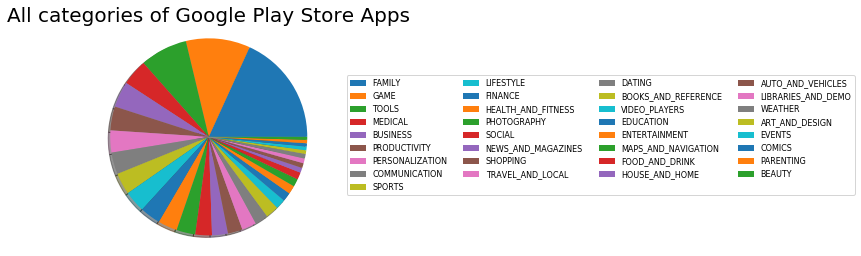

In [3]:
category = data.groupby(by='Category')['Category'].count().sort_values(ascending=False).drop('1.9')
label = category.index.tolist()

patches, texts = plt.pie(category,shadow=True)
plt.title('All categories of Google Play Store Apps',fontsize=20)
plt.legend(patches, label,ncol=4,fontsize=8,bbox_to_anchor=(0.9, 0.8))
plt.axis('equal')
plt.show()

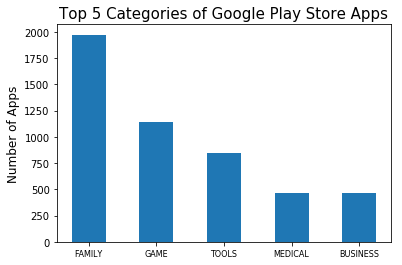

In [4]:
top = 5
x = range(top)
plt.bar(x,category.head(n=top),width=0.5)
plt.title('Top 5 Categories of Google Play Store Apps',fontsize=15)
plt.xticks(x,category.index,fontsize=8)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

From the plots, we can see that FAMILY (living) and GAME (entertainment) are the most popular categories, showing that people use mobile applications mostly during living. After those, work involving techniques appears (including MEDEICAL, BUSINESS, SPORTS, FINANCE, etc). 

#### Ratings
Ratings reflect how users like the applications. The higher the ratings, the more user like the app from many aspects (usage, efficiency, price, etc).

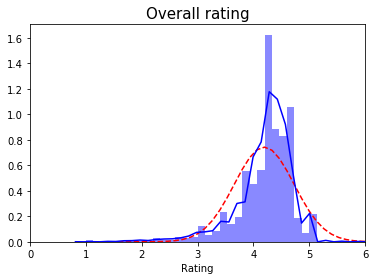

In [5]:
rating = data['Rating'].dropna()

n_bins = 135
n,bins,patches = plt.hist(rating,n_bins,density=1,color='b',alpha=0.1)
plt.title('Overall rating',fontsize=15)
plt.xlim((0,6))

mu = rating.mean()
sigma = rating.std()
y = scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,y,'r--')
sns.distplot(rating,color='b',bins=n_bins)
plt.show()

The general shape of the overall rating looks roughly like Gaussian distributed centered at about 4, implying that most users feel OK with their apps while a few are awful and a few are excellent. 

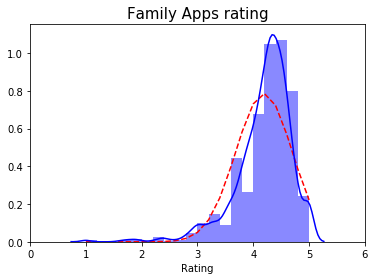

In [6]:
family = data[data['Category']=='FAMILY']
family_r = family['Rating'].dropna()

n_bins = 20
n,bins,patches = plt.hist(family_r,n_bins,density=1,color='b',alpha=0.1)
plt.title('Family Apps rating',fontsize=15)
plt.xlim((0,6))

mu = family_r.mean()
sigma = family_r.std()
y = scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,y,'r--')
sns.distplot(family_r,color='b',bins=n_bins)
plt.show()

Family Applications are the most popular category, so we take a look at it and compare with the overall. The shape of the family applications rating looks very similar to the overall rating while it has a higher mean and smaller variance, implying that family applications seem to be over averge. 

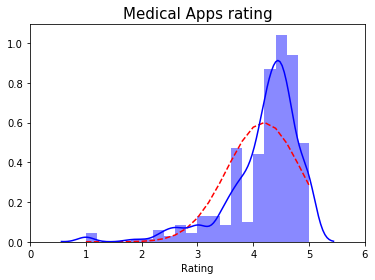

In [7]:
medical = data[data['Category']=='MEDICAL']
medical_r = medical['Rating'].dropna()

n_bins = 20
n,bins,patches = plt.hist(medical_r,n_bins,density=1,color='b',alpha=0.1)
plt.title('Medical Apps rating',fontsize=15)
plt.xlim((0,6))

mu = medical_r.mean()
sigma = medical_r.std()
y = scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,y,'r--')
sns.distplot(medical_r,color='b',bins=n_bins)
plt.show()

Although medical apps are less than family apps, because of its higher requirements of techniques, medical apps appear to have generally higher rating. However, also because of the strict demand of techniques, poorly-performed apps receive much lower ratings. This happens to many other technique-depended categories, for example, business. 

#### Type

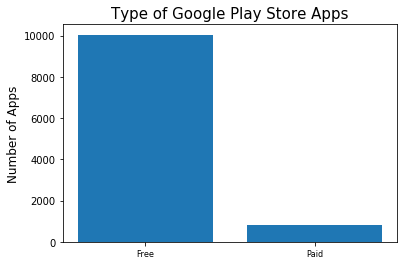

In [8]:
type = data.groupby(by='Type')['Type'].count().sort_values(ascending=False).drop('0')

plt.bar(range(2),type)
plt.title('Type of Google Play Store Apps',fontsize=15)
plt.xticks(range(2),type.index,fontsize=8)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

Clearly, most apps on Google Play Store are free for installation since Android welcomes all companies to develop release their own apps. 

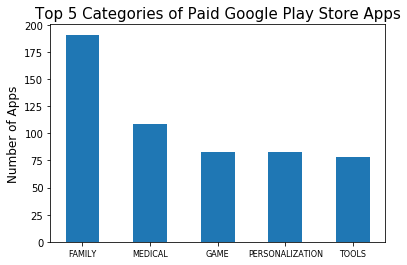

In [9]:
paid = data[data['Type']=='Paid']
paid_c = paid.groupby(by='Category')['Category'].count().sort_values(ascending=False)

top = 5
x = range(top)
plt.bar(x,paid_c.head(n=top),width=0.5)
plt.title('Top 5 Categories of Paid Google Play Store Apps',fontsize=15)
plt.xticks(x,paid_c.index,fontsize=8)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

#### Paid Apps

Among all paid apps, FAMILY is still the most populated category. However, we want to know whether it's because the total number is large or the percentage is large. In addition, we can see that MEDICAL is the second most populated one. So we want to look more into the percentage to make a comparison. 

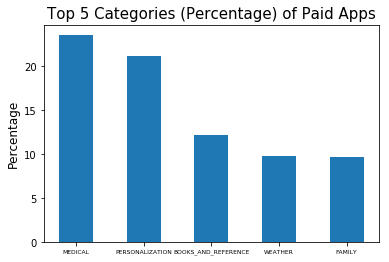

In [10]:
label = paid_c.index.tolist()

df = pd.DataFrame(columns=['Category','Percentage'])
for i in label:
    p = float(paid_c[paid_c.index==i]/category[category.index==i]*100)
    df = df.append({'Category': i, 'Percentage': p}, ignore_index=True)

df_c = df.sort_values(by='Percentage',ascending=False)
plt.bar(x,df_c['Percentage'].head(n=top),width=0.5)
plt.title('Top 5 Categories (Percentage) of Paid Apps',fontsize=15)
plt.xticks(x,df_c['Category'].head(n=top),fontsize=6)
plt.ylabel('Percentage',fontsize=12)
plt.show()

From this graph, it's clear that MEDICAL has the most percentage of paid apps. And the next is PERSONALIZE. From this graph, we understand that the more specialized the app is, the more probable that it is a paid app. 

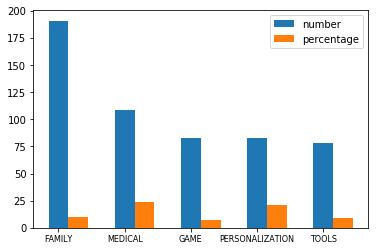

In [11]:
top = 5
x = np.arange(top)
plt.bar(x,paid_c.head(n=top),width=0.3,label='number')
plt.bar(x+0.3,df['Percentage'].head(n=top),width=0.3,label='percentage')
plt.xticks(x,paid_c.index,fontsize=8)
plt.legend()
plt.show()

This is a graph showing number and percentage together, so that we can get a better feel of those paid apps categories. We can see that number of paid FAMILY is large mainly because the total number is large, while the number of paid MEDICAL is large because the percentage of paid apps is large. 

#### Content Rating
Content rating shows what group of users the apps are designed for. 

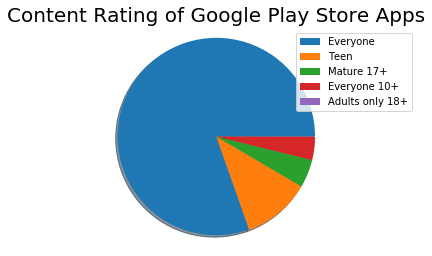

In [12]:
content = data.groupby(by='Content Rating')['Content Rating'].count().sort_values(ascending=False).drop('Unrated')
label = content.index.tolist()

patches, texts = plt.pie(content,shadow=True)
plt.title('Content Rating of Google Play Store Apps',fontsize=20)
plt.legend(patches, label,loc='upper right',bbox_to_anchor=(1.1, 1.0))
plt.axis('equal')
plt.show()

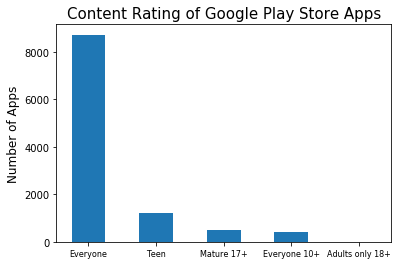

In [13]:
x = range(5)
plt.bar(x,content,width=0.5)
plt.title('Content Rating of Google Play Store Apps',fontsize=15)
plt.xticks(x,content.index,fontsize=8)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

As expected, most apps are designed for everyone. Aside from those apps, we can see that there are a lot of apps designed for teens since teens nowadays have relative more time and master the ability to get used to most new techniques. They like to play with electronic devices and have the curiosity to make them functional to replace some traditional ways to deal with problems. So, we would like to focus more on this specific group and investigate what kind of apps they like the most and whether that category structure will vary from the overall trend or not. 

#### Apps for Teens

In [14]:
teen = data[data['Content Rating']=='Teen']
teen_c = teen.groupby(by='Category')['Category'].count().sort_values(ascending=False)
teen_c

Category
GAME                   331
FAMILY                 261
SOCIAL                 125
ENTERTAINMENT           96
PERSONALIZATION         56
SHOPPING                49
NEWS_AND_MAGAZINES      34
COMMUNICATION           32
VIDEO_PLAYERS           24
LIFESTYLE               23
COMICS                  22
BOOKS_AND_REFERENCE     21
HEALTH_AND_FITNESS      20
SPORTS                  16
BUSINESS                13
DATING                  12
PHOTOGRAPHY             12
PRODUCTIVITY             9
FOOD_AND_DRINK           8
EVENTS                   8
TRAVEL_AND_LOCAL         6
FINANCE                  5
TOOLS                    5
MEDICAL                  5
BEAUTY                   3
ART_AND_DESIGN           3
HOUSE_AND_HOME           2
MAPS_AND_NAVIGATION      2
WEATHER                  2
EDUCATION                1
PARENTING                1
AUTO_AND_VEHICLES        1
Name: Category, dtype: int64

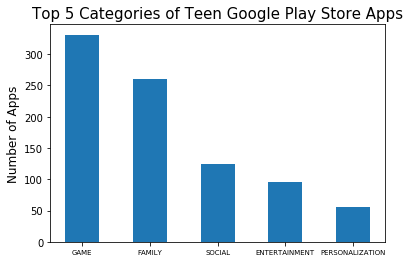

In [15]:
top = 5
x = range(top)
plt.bar(x,teen_c.head(n=top),width=0.5)
plt.title('Top 5 Categories of Teen Google Play Store Apps',fontsize=15)
plt.xticks(x,teen_c.index,fontsize=7)
plt.ylabel('Number of Apps',fontsize=12)
plt.show()

Compare this bar chart with the bar chart for the overall apps, we can find that there are some obvious differences. For teens, number of apps of their interest and apps that are used for their life and study have a large increase. Apps in category like Game, Social and Personalize are very popular among teens. Teens love to play games and other entertainment. They need social, personalize and shopping apps to help them with their everyday life. Different from adults, teens don't have much knowledge and experience in professional areas like medical and business so that the number of apps specilized for those high-tech zones is very small. Additionally, teens don't need to worry everything about their family as their parents can deal with many problems so that the relative number of family apps is smaller than the overall number.The category of apps for teens correctly reflect characteristics of teens.  

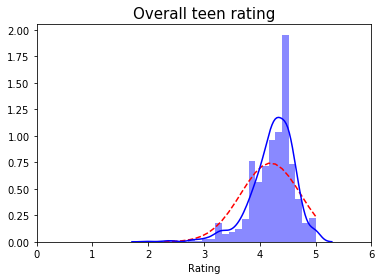

In [16]:
rating_t = teen['Rating'].dropna()

n_bins = 25
n,bins,patches = plt.hist(rating_t,n_bins,density=1,color='b',alpha=0.1)
plt.title('Overall teen rating',fontsize=15)
plt.xlim((0,6))

mu = rating.mean()
sigma = rating.std()
y = scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,y,'r--')
sns.distplot(rating_t,color='b',bins=n_bins)
plt.show()

From this histogram plot, we find that the overall rating for apps for teens on Google Play Store looks to have a higher mean than the overall rating for all apps, showing that the quality of those apps are generally above average. 

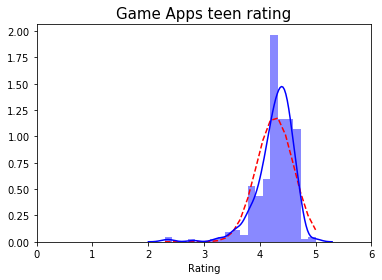

In [17]:
game = teen[teen['Category']=='GAME']
game_r = game['Rating'].dropna()

n_bins = 20
n,bins,patches = plt.hist(game_r,n_bins,density=1,color='b',alpha=0.1)
plt.title('Game Apps teen rating',fontsize=15)
plt.xlim((0,6))

mu = game_r.mean()
sigma = game_r.std()
y = scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,y,'r--')
sns.distplot(game_r,color='b',bins=n_bins)
plt.show()

## 3. Conclusion

Overall, as the official apps platform for Android operating system, Google Play Store serves for a large variety of categories of apps from living, which provides convenience or entertainment in our everydaylife, to working, which requires professional techniques. While different categories of apps may have different quality and features, their general quality according to the rating shares similar trends. Most of them could be considered satisfactory, while a few of them show excellent quality (rating goes to 5) and a few perform terribly bad (rating goes to 1). As the feature of Android operating system, open source welcome companies and individuals to release their own apps. As a result, Most of the apps are free. Among paid apps, some of them requires professional knowledge such as medical, and some of them are designed for specialization such as personalization so that users are willing to pay for convenience. Considering the group of users that the apps designed for, most apps are face to everyone. However, there are quite many apps designed specially for teenagers. Speaking of teenagers, they have relatively more time for and the ability and curiosity to adapt to new techniques including those apps on their smartphones. At the same time, they loves playing games or other entertainment. In addition, they are new to the society so they don't have or need a lot of knowledge involving some professional areas. Most of the time, they only need to deal with some simple everyday problems for living, such as reading books and magazines, shopping, work out timetables for them to follow and etc. The apps also make full consideration about those characteristics. Game, entertainment and sports are very popular among teenagers to provide a variety of choices during their leisure time. Social apps help teenagers to familiarize with the society. Personalization, shopping, books and comics, dating and photography apps are also popular to provide a convenient and confortable environment of teenagers' daily life. Different from the apps for adults, we can see that apps require too much professional knowledge such as medical and finance are not very popular among teenagers. 